# Qcodes example with Signal Hound USB-SA124B

In [1]:
%matplotlib notebook

In [2]:
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id

In [3]:
from qcodes.instrument_drivers.signal_hound.USB_SA124B import SignalHound_USB_SA124B

In [4]:
sh = SignalHound_USB_SA124B('mysignalhound')

Connected to: Signal Hound sa124B (serial:17172185, firmware:Version 3.13) in 6.03s


## Frequency trace

The primary functionality of the Signal Hound driver is to capture a frequency trace. 
The frequency trace is defined by the center frequency and span. After changing any parameter on the Signal Hound 
is is important to sync the parameters to the device or you will get a runtime error.

In [5]:
sh.frequency(1e9)
sh.span(10e6)
sh.configure()

We can now capture a trace.

In [6]:
meas = Measurement()
meas.register_parameter(sh.trace)

with meas.run() as datasaver:
    datasaver.add_result((sh.trace, sh.trace(),))
    runid = datasaver.run_id

Starting experimental run with id: 741


<IPython.core.display.Javascript object>


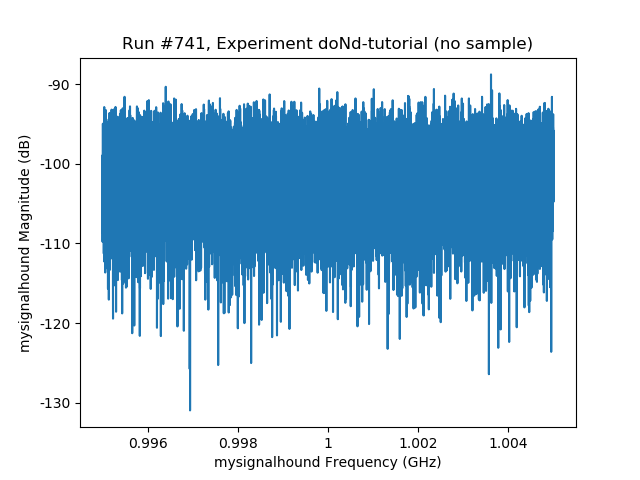

([<matplotlib.axes._subplots.AxesSubplot at 0x1d551d8c2e8>], [None])

In [7]:
plot_by_id(runid)

In this case we are not measuring any signal so as expected we see noise

## Averaging

The driver supports averaging over multiple traces simply by setting the number of averages

In [8]:
sh.avg(10)

In [9]:
meas = Measurement()
meas.register_parameter(sh.trace)

with meas.run() as datasaver:
    datasaver.add_result((sh.trace, sh.trace(),))
    runid = datasaver.run_id

Starting experimental run with id: 742


<IPython.core.display.Javascript object>


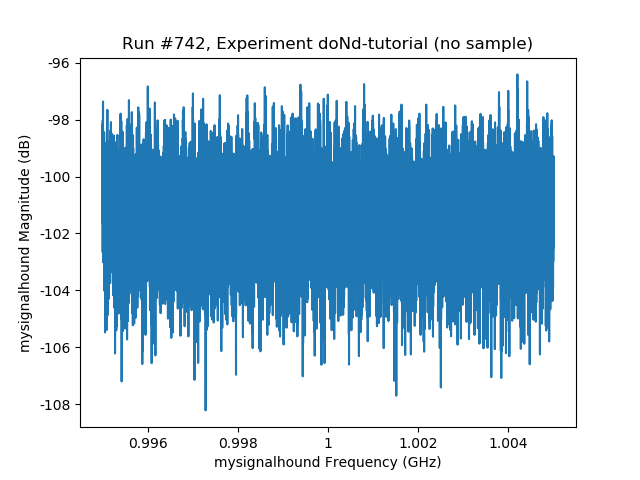

([<matplotlib.axes._subplots.AxesSubplot at 0x1d552f82780>], [None])

In [10]:
plot_by_id(runid)

We note that the spread of the noise level has gone down compared to a single measurement

## Power

The Spectrum Analyzer also supports measuring the power at a specific frequency. This works by capturing a trace with a span of 250 KHz (The minimum supported)around the center frequency and returning the maximum value in that range.

In [11]:
sh.power()

-97.48905792236329